# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=1_000
steps1=10_000_000
steps2=10_000_000
batch1=1
batch2=1_000
deterministic=False
mortality=False

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

train...
phase 1
use_vecmonitor False
use_callback False
training...
---------------------------------
| explained_variance | -0.0013  |
| fps                | 1780     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 50.8     |
| total_timesteps    | 0        |
| value_loss         | 1.47e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.754    |
| fps                | 2243     |
| nupdates           | 1000     |
| policy_entropy     | 0.505    |
| policy_loss        | -0.195   |
| total_timesteps    | 2458539  |
| value_loss         | 23.3     |
-----------

3100224 timesteps
Best mean reward: 222.10 - Last mean reward per episode: 219.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.24707 |
| explained_variance | 0.847     |
| fps                | 3207      |
| nupdates           | 15        |
| policy_entropy     | 0.28      |
| policy_loss        | 1.06      |
| total_timesteps    | 2892974   |
| value_loss         | 25.4      |
----------------------------------
3305244 timesteps
Best mean reward: 222.10 - Last mean reward per episode: 221.14
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 221.38205 |
| explained_variance | 0.849     |
| fps                | 3206      |
| nupdates           | 16        |
| policy_entropy     | 0.273     |
| policy_loss        | 1.04      |
| total_timesteps    | 3099615   |
| value_loss         | 25        |
----------------------------------
3512676 timesteps
Best mean reward: 222.10 - Last mean reward per 

6819528 timesteps
Best mean reward: 222.46 - Last mean reward per episode: 220.76
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.60722 |
| explained_variance | 0.857     |
| fps                | 3202      |
| nupdates           | 33        |
| policy_entropy     | 0.286     |
| policy_loss        | -0.188    |
| total_timesteps    | 6612512   |
| value_loss         | 11.9      |
----------------------------------
7024548 timesteps
Best mean reward: 222.46 - Last mean reward per episode: 219.39
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 220.82799 |
| explained_variance | 0.842     |
| fps                | 3202      |
| nupdates           | 34        |
| policy_entropy     | 0.283     |
| policy_loss        | -0.249    |
| total_timesteps    | 6819153   |
| value_loss         | 14.2      |
----------------------------------
7231980 timesteps
Best mean reward: 222.46 - Last mean reward per 

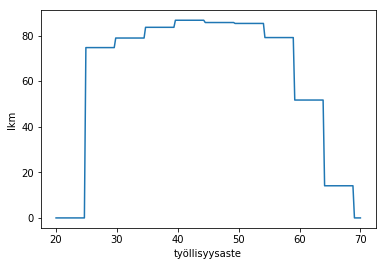

best_emp 0
Vaikutus työllisyysasteen keskiarvo 1394793.0 htv, mediaani 1394793.0 htv
                        keskiarvo 1404021.0 työllistä, mediaani 1404021.0 työllistä


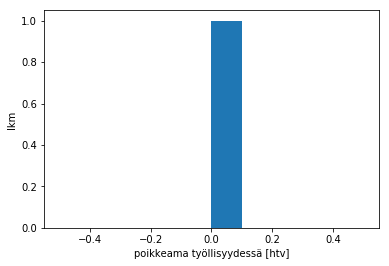

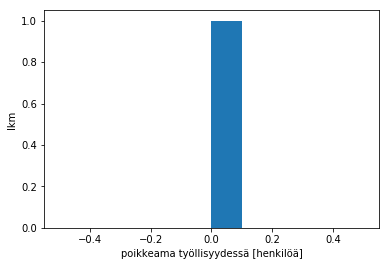

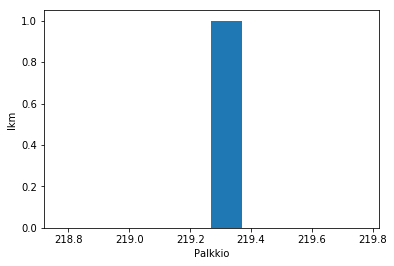

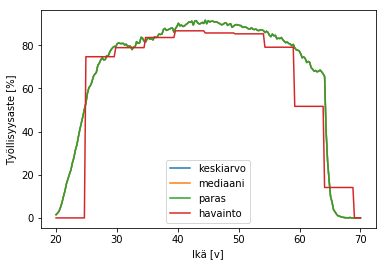

In [5]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,randomness=True,\
              deterministic=False)
cc1.explain()
cc1.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,randomness=True)
cc2.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)

In [ ]:
#cc1.simulate(pop=10_000,deterministic=True,load='best/best_perus',rlmodel='acktr',save='perusmalli',modify_load=False)
#cc2.simulate(pop=10_000,deterministic=True,load='best/best_ek',rlmodel='acktr',save='eknmalli',modify_load=False)
cc2.compare_with(cc1)

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,\
                  perustulo=False,randomness=True
cc1_400.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)
cc1_400.compare_with(cc1)

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,\
                  perustulo=False,randomness=True
cc1_toe.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)

In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,\
                  mortality=mortality,perustulo=False,randomness=True
cc1_350.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)

In [ ]:
cc1_350.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,\
                    perustulo=False,randomness=True
cc1_putki.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)
cc1_putki.compare_with(cc1)                    

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,randomness=True
cc1_pt.run_results(debug=False,steps1=steps1,steps2=steps2,n=0,pop=pop_size,deterministic=deterministic,\
               train=True,predict=True,batch1=batch1,batch2=batch2,bestname='best_perus',plot=True)

In [ ]:
cc1_pt.compare_with(cc1)